# Prac 6: Model regularization using data augmentation and dropout

In this practical we will train the same model developed in prac 5 but here we will analyse the model to identify the issue of overfitting and then solve the issue with an approach called model regularization.

## Tasks:

1. Implementation of deep neural network model for the task of Cats and Dogs image classification.
2. Analyzing the model to identify the issue of overfitting.
3. Apply some model regularization approaches such as data augmentation and dropout.


### 1. Import packages

Import tensorflow, numpy, os and keras


In [ ]:
import sys
sys.path.append('/home/shubharthak/miniconda3/lib/python3.12/site-packages')

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2. Dataset preparation


In [13]:
#In prac 5 we used the already downloaded dataset. We can also download the data from the source directly into our notebook.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2024-10-17 05:56:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  28.8MB/s    in 2.3s    

2024-10-17 05:56:50 (28.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Cat images dir (training)
train_cats_dir = os.path.join(train_dir, 'cats')

# Dog images dir (training)
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Can images dir (validation)
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Dog images dir (validation)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Image rescaling by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 3.  Model architecture

The following CNN architecture will be implemented:

<img src='CNN_Model_Prac6.png' alt='Conv'>

Input: $150 \times 150 \times 3$ image

No. of filters, filter size:
- Conv1 : 32, 3x3
- Conv2 : 64, 3x3
- Conv3 : 128, 3x3
- Conv4 : 128, 3x3

Activation function in CONV layers: Relu
Pool: MaxPooling, 2x2
Activation function in the Output layer : sigmoid, 2 classes

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['acc'])

### 4.  Model training

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:

print(train_generator.class_indices)
print(validation_generator.class_indices)

print(train_generator.samples)
print(validation_generator.samples)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
2000
1000


In [34]:
# Model training
history = model.fit(
      train_generator,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2,)
# history = model.fit(
#       train_generator,
#       steps_per_epoch=100,
#       epochs=20,
#       verbose=2)

Epoch 1/20
100/100 - 8s - 76ms/step - acc: 0.5110 - loss: 0.6914 - val_acc: 0.5000 - val_loss: 0.6847
Epoch 2/20
100/100 - 5s - 50ms/step - acc: 0.5725 - loss: 0.6725 - val_acc: 0.6240 - val_loss: 0.6527
Epoch 3/20
100/100 - 6s - 57ms/step - acc: 0.6225 - loss: 0.6451 - val_acc: 0.6650 - val_loss: 0.6280
Epoch 4/20
100/100 - 4s - 45ms/step - acc: 0.6600 - loss: 0.6092 - val_acc: 0.6950 - val_loss: 0.5942
Epoch 5/20
100/100 - 6s - 60ms/step - acc: 0.7075 - loss: 0.5713 - val_acc: 0.6880 - val_loss: 0.5809
Epoch 6/20
100/100 - 9s - 93ms/step - acc: 0.7230 - loss: 0.5445 - val_acc: 0.7080 - val_loss: 0.5666
Epoch 7/20
100/100 - 7s - 73ms/step - acc: 0.7400 - loss: 0.5239 - val_acc: 0.6580 - val_loss: 0.6218
Epoch 8/20
100/100 - 6s - 57ms/step - acc: 0.7410 - loss: 0.5167 - val_acc: 0.7090 - val_loss: 0.5599
Epoch 9/20
100/100 - 6s - 57ms/step - acc: 0.7660 - loss: 0.4952 - val_acc: 0.5960 - val_loss: 0.7134
Epoch 10/20
100/100 - 10s - 102ms/step - acc: 0.7805 - loss: 0.4762 - val_acc: 0.7

### 5. Result visualization and analysis

Task: Plot the training and validation set accuracies (epochs vs acc and epochs vs val_acc)

**5.1)** Can you identify any issue related to Bias and Variance?

**5.2)** Is there any issue of underfitting or overfitting?

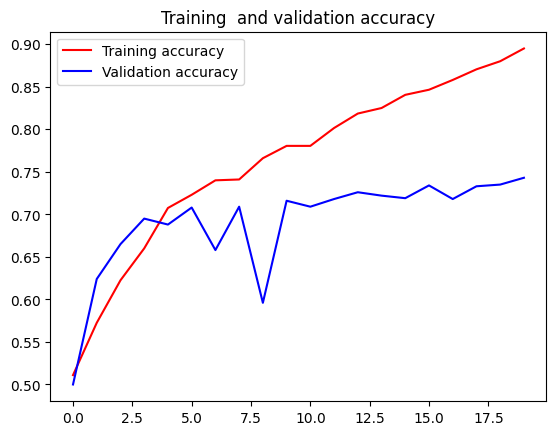

<Figure size 640x480 with 0 Axes>

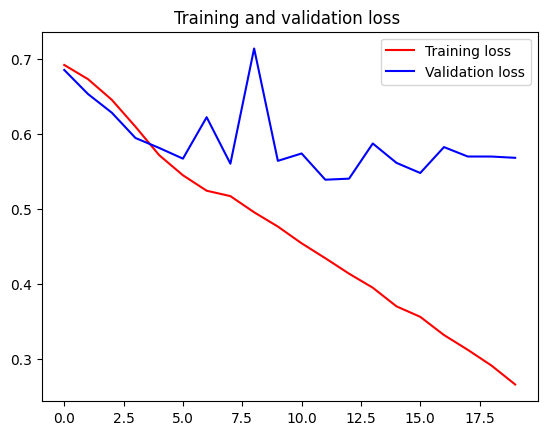

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training  and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show();

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss ')
plt.legend(loc=0)
plt.figure()
plt.show();


### 6.  Data augmentation

Let's use the same model architecture but augment the data to enrich the training set

In [37]:
model_data_aug = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Image data augmentation
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 7. Training the model again with augmented data

Compile and fit the model using the same settings of step 4.

In [38]:
# ## Write code here
model_data_aug.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['acc'])

history_aug = model_data_aug.fit(
      train_generator,
      # steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=50,
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 17s - 171ms/step - acc: 0.5195 - loss: 0.6922 - val_acc: 0.5020 - val_loss: 0.6924
Epoch 2/20
100/100 - 19s - 188ms/step - acc: 0.5380 - loss: 0.6851 - val_acc: 0.6220 - val_loss: 0.6617
Epoch 3/20
100/100 - 21s - 206ms/step - acc: 0.5510 - loss: 0.6786 - val_acc: 0.6140 - val_loss: 0.6528
Epoch 4/20
100/100 - 16s - 159ms/step - acc: 0.5795 - loss: 0.6727 - val_acc: 0.6050 - val_loss: 0.6522
Epoch 5/20
100/100 - 17s - 166ms/step - acc: 0.5950 - loss: 0.6597 - val_acc: 0.6540 - val_loss: 0.6300
Epoch 6/20
100/100 - 18s - 176ms/step - acc: 0.6050 - loss: 0.6540 - val_acc: 0.6490 - val_loss: 0.6219
Epoch 7/20
100/100 - 14s - 143ms/step - acc: 0.6360 - loss: 0.6354 - val_acc: 0.6760 - val_loss: 0.5975
Epoch 8/20
100/100 - 16s - 156ms/step - acc: 0.6520 - loss: 0.6227 - val_acc: 0.6980 - val_loss: 0.5761
Epoch 9/20
100/100 - 21s - 205ms/step - acc: 0.6445 - loss: 0.6154 - val_acc: 0.6900 - val_loss: 0.5709
Epoch 10/20
100/100 - 19s - 190ms/step - acc: 0.6620 - loss: 0.6080 - val_a

### 8.  Result visualization and analysis
Plot the training and validation set accuracies as done in step 5.

**8.1)** Analyze the results and discuss whether the issues of underfitting or overfitting have improved?




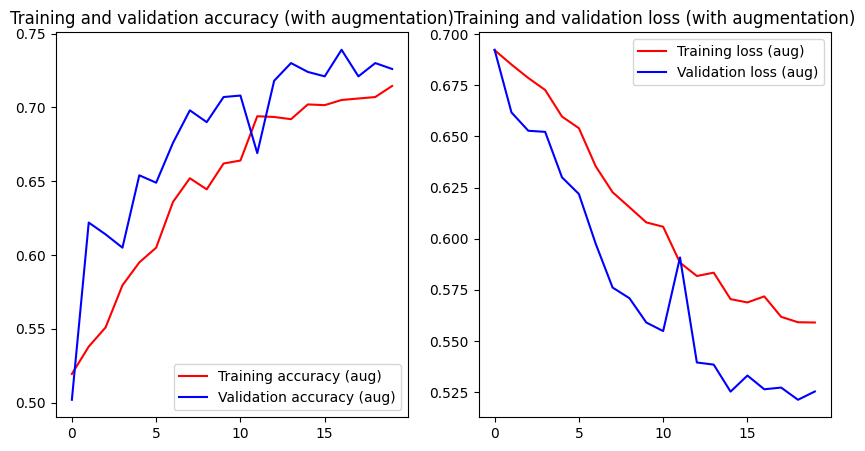

In [39]:
# ## Write code here
acc_aug = history_aug.history['acc']
val_acc_aug = history_aug.history['val_acc']
loss_aug = history_aug.history['loss']
val_loss_aug = history_aug.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_aug, 'r', label='Training accuracy (aug)')
plt.plot(epochs, val_acc_aug, 'b', label='Validation accuracy (aug)')
plt.title('Training and validation accuracy (with augmentation)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss_aug, 'r', label='Training loss (aug)')
plt.plot(epochs, val_loss_aug, 'b', label='Validation loss (aug)')
plt.title('Training and validation loss (with augmentation)')
plt.legend()
plt.show()

### 9. Using data augmentation together with drop out

In [40]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


#Use the same model but this time add a drop out layer

model_drop_out = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # TODO: Add a dropout layer here with a rate value of 0.5 .. #https://keras.io/api/layers/regularization_layers/dropout/


    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model.

In [42]:
# ## Write your code here
model_drop_out.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=1e-4), metrics=['acc'])


Fit the model.

In [43]:
# ## Write your code here

history_drop_out = model_drop_out.fit(
      train_generator,
      # steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=50,
      verbose=2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 18s - 183ms/step - acc: 0.5030 - loss: 0.6931 - val_acc: 0.6150 - val_loss: 0.6847
Epoch 2/20
100/100 - 15s - 146ms/step - acc: 0.5420 - loss: 0.6857 - val_acc: 0.5250 - val_loss: 0.6754
Epoch 3/20
100/100 - 16s - 158ms/step - acc: 0.5605 - loss: 0.6788 - val_acc: 0.6210 - val_loss: 0.6553
Epoch 4/20
100/100 - 19s - 191ms/step - acc: 0.5905 - loss: 0.6638 - val_acc: 0.6340 - val_loss: 0.6416
Epoch 5/20
100/100 - 14s - 145ms/step - acc: 0.6070 - loss: 0.6608 - val_acc: 0.6260 - val_loss: 0.6343
Epoch 6/20
100/100 - 20s - 201ms/step - acc: 0.6020 - loss: 0.6531 - val_acc: 0.6120 - val_loss: 0.6367
Epoch 7/20
100/100 - 21s - 209ms/step - acc: 0.6075 - loss: 0.6449 - val_acc: 0.6760 - val_loss: 0.6108
Epoch 8/20
100/100 - 17s - 174ms/step - acc: 0.6460 - loss: 0.6273 - val_acc: 0.6750 - val_loss: 0.5924
Epoch 9/20
100/100 - 17s - 175ms/step - acc: 0.6590 - loss: 0.6153 - val_acc: 0.6830 - val_loss: 0.5870
Epoch 10/20
100/100 - 15s - 155ms/step - acc: 0.6615 - loss: 0.6157 - val_a

### 10. Result visualization and analysis
Plot the training and validation set accuracies (epochs vs acc and epochs vs val_acc).

Compare the results with the previous model that only uses data augmentation?

Can you think of other available approaches to improve the accuracy further.




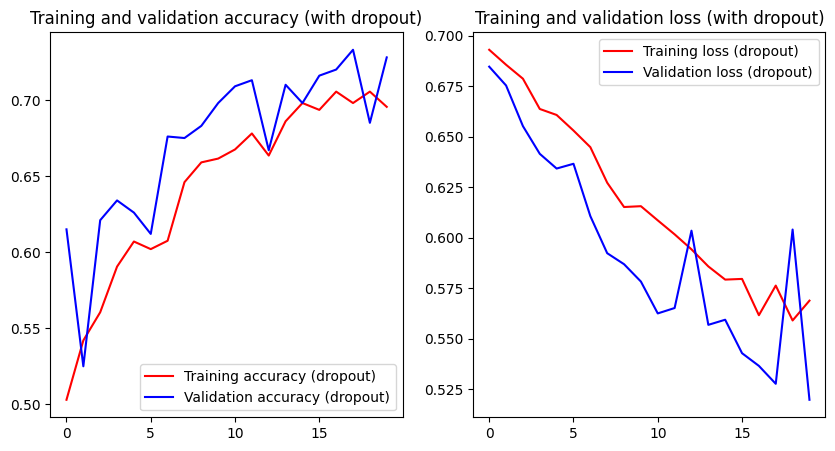

In [44]:
# ## Write code here
acc_drop_out = history_drop_out.history['acc']
val_acc_drop_out = history_drop_out.history['val_acc']
loss_drop_out = history_drop_out.history['loss']
val_loss_drop_out = history_drop_out.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_drop_out, 'r', label='Training accuracy (dropout)')
plt.plot(epochs, val_acc_drop_out, 'b', label='Validation accuracy (dropout)')
plt.title('Training and validation accuracy (with dropout)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss_drop_out, 'r', label='Training loss (dropout)')
plt.plot(epochs, val_loss_drop_out, 'b', label='Validation loss (dropout)')
plt.title('Training and validation loss (with dropout)')
plt.legend()
plt.show()

In [54]:
#saving the model
# model_drop_out.save('model_drop_out.h5')

model_data_aug.save('model_data_aug.h5')